In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Microsoft_Stock.csv")


In [3]:
df.head()

Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
#Changing the Date column to datetime format.
df["Date"] = pd.to_datetime(df["Date"])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [6]:
#Getting rid of the hour,minute and second from Date column.
for i in range(len(df["Date"])):
      df["Date"][i]= df["Date"][i].strftime('%Y-%m-%d')
df.Date

0      2015-04-01
1      2015-04-02
2      2015-04-06
3      2015-04-07
4      2015-04-08
          ...    
1506   2021-03-25
1507   2021-03-26
1508   2021-03-29
1509   2021-03-30
1510   2021-03-31
Name: Date, Length: 1511, dtype: datetime64[ns]

In [7]:
#Setting the index to column Date
df=df.set_index(['Date'])

In [8]:
#checking for missing values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.shape

(1511, 5)

In [10]:
df.describe()

Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08

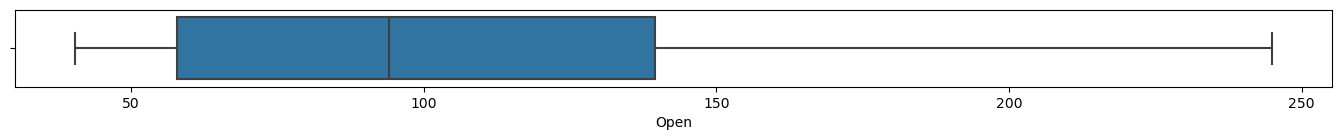

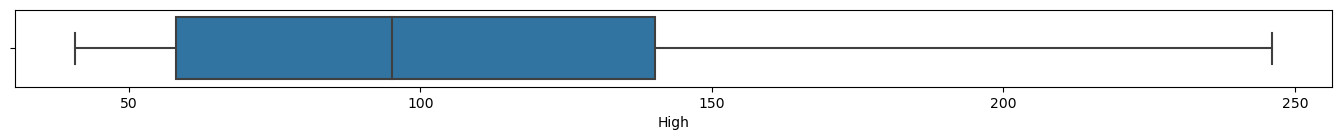

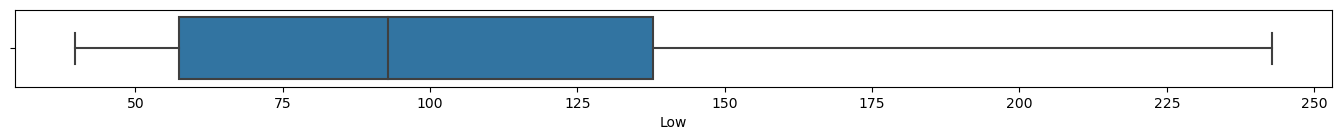

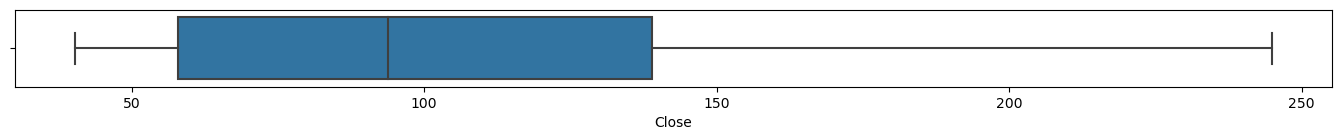

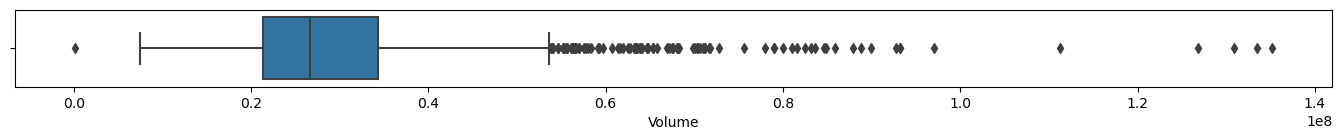

In [11]:
#Creating boxplot to see outliers
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)
        

In [12]:
#Creating histogram of Volume column
fig = px.histogram(df, x='Volume')

fig.show()

In [13]:
df_filtered = df[(df["Volume"] < df["Volume"].quantile(0.98))  & (df["Volume"] > df["Volume"].quantile(0.01))]

In [14]:
fig = px.histogram(df_filtered, x='Volume')

fig.show()

In [15]:
df_filtered.describe()


Open         High          Low        Close        Volume
count  1464.000000  1464.000000  1464.000000  1464.000000  1.464000e+03
mean    107.408456   108.404112   106.350546   107.440041  2.917109e+07
std      56.911492    57.568657    56.215573    56.914145  1.107200e+07
min      40.340000    40.740000    40.120000    40.290000  1.238009e+07
25%      57.865000    58.060000    57.420000    57.872500  2.141077e+07
50%      94.020000    95.120000    92.930000    93.890000  2.649452e+07
75%     138.962500   139.690000   137.020000   138.452500  3.382977e+07
max     245.030000   246.130000   242.920000   244.990000  7.061660e+07

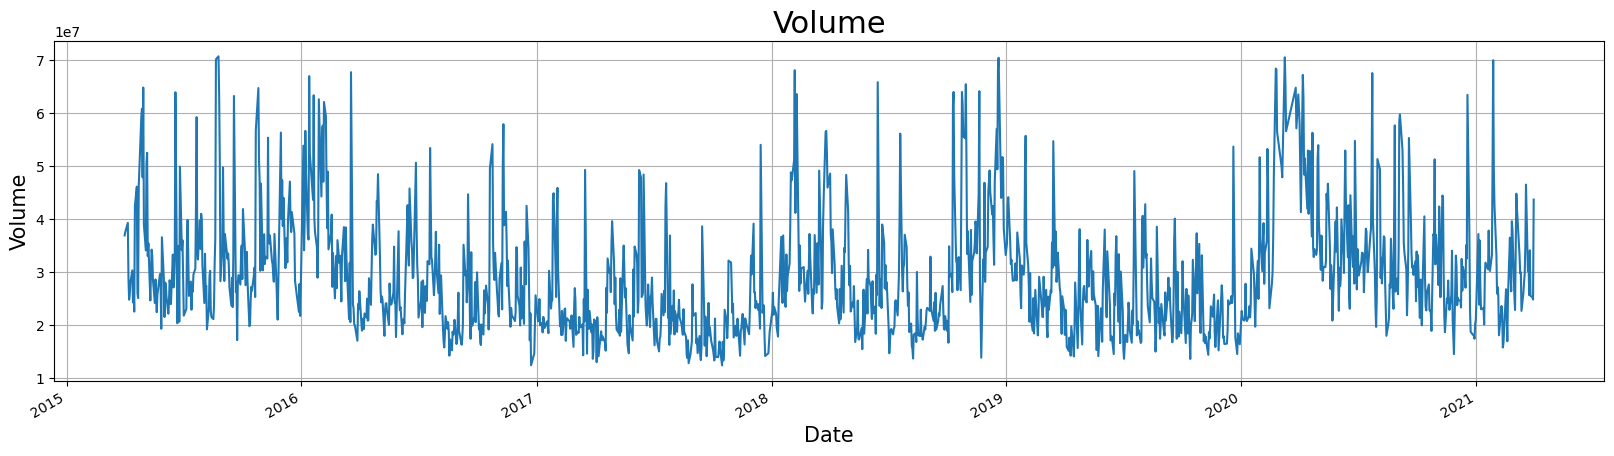

In [16]:
ax = df_filtered['Volume'].plot(figsize=(20,5))
ax.set_title('Volume', fontsize = 22)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Volume', fontsize = 15)
plt.grid(True)
plt.show()


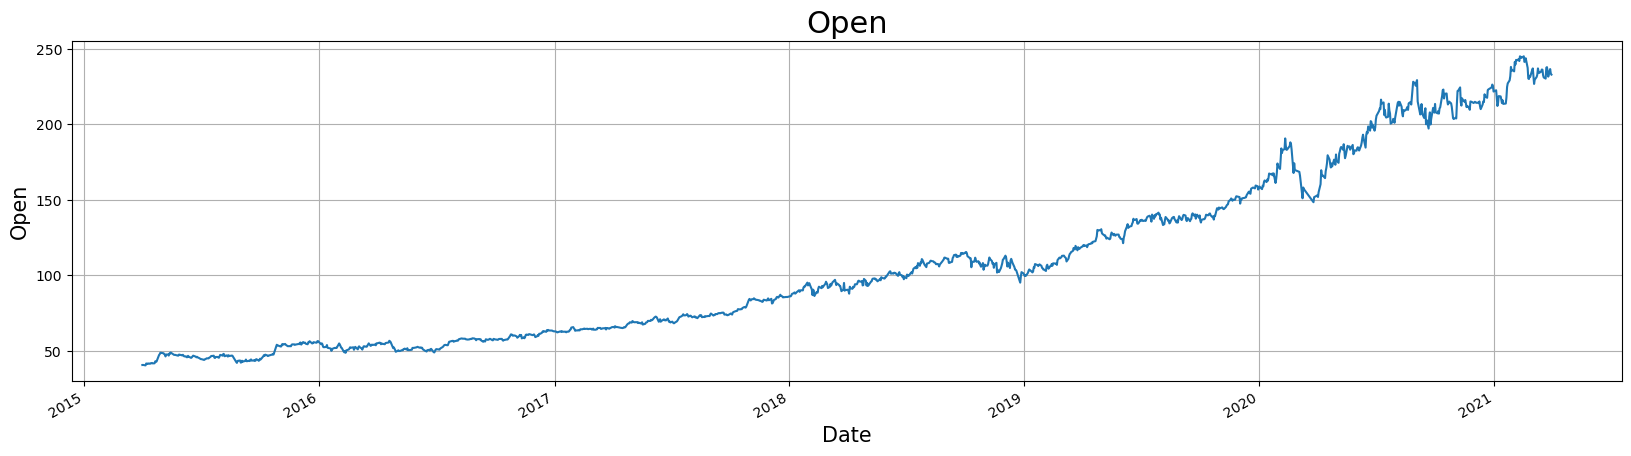

In [17]:
ax = df_filtered['Open'].plot(figsize=(20,5))
ax.set_title('Open', fontsize = 22)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Open', fontsize = 15)
plt.grid(True)
plt.show()

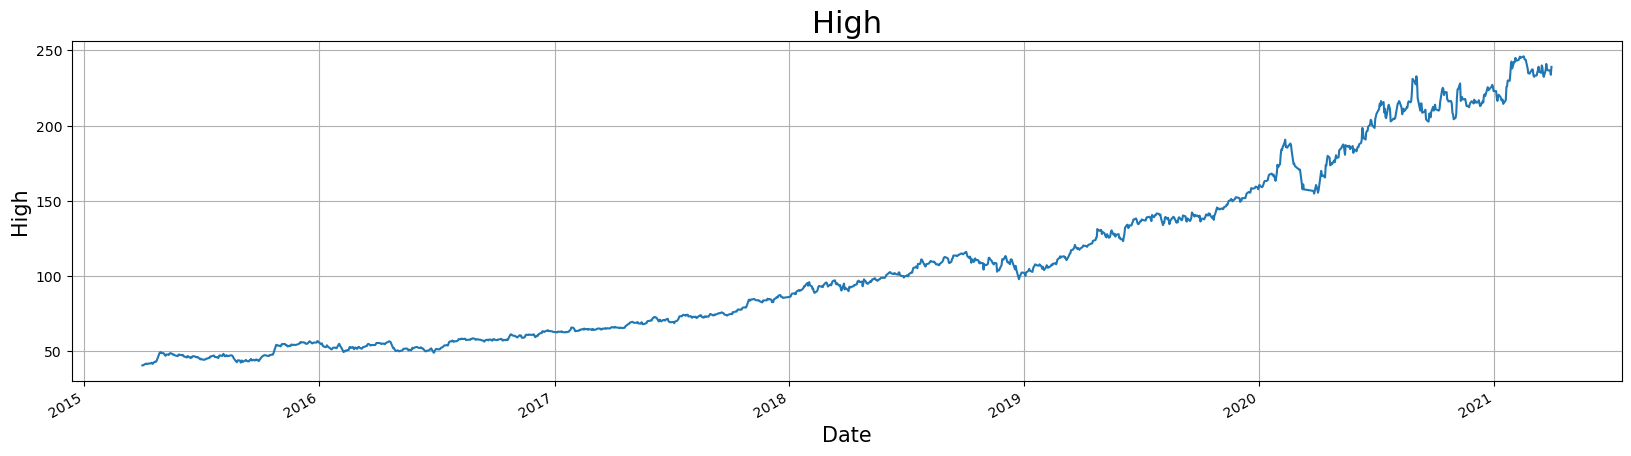

In [18]:
ax = df_filtered['High'].plot(figsize=(20,5))
ax.set_title('High', fontsize = 22)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('High', fontsize = 15)
plt.grid(True)
plt.show()

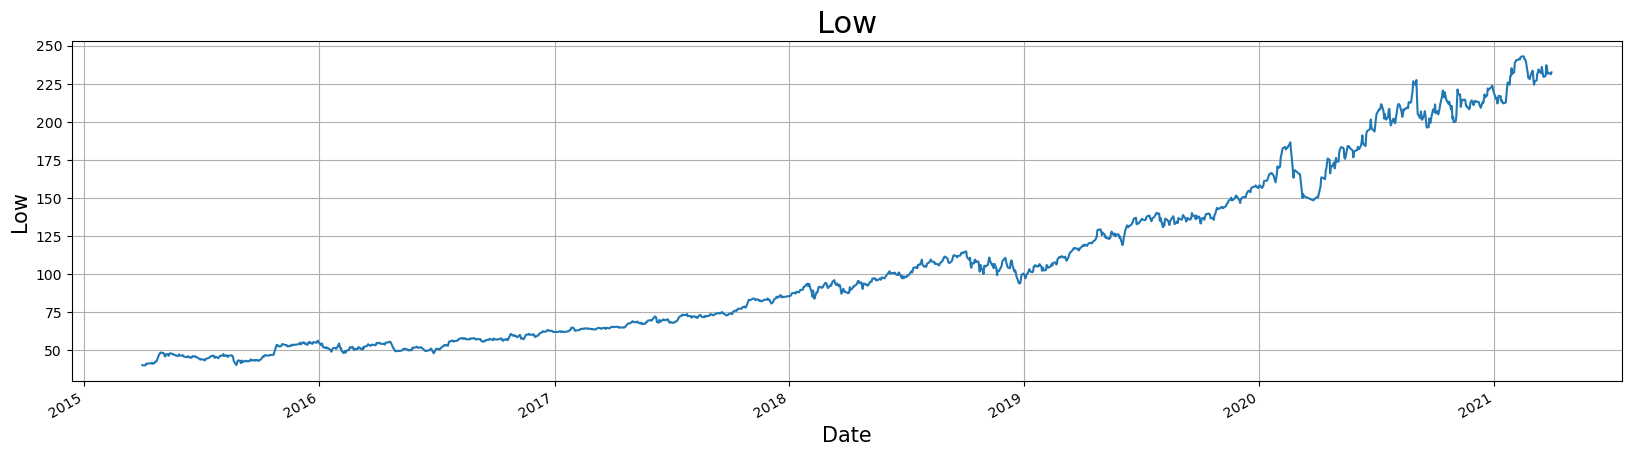

In [19]:
ax = df_filtered['Low'].plot(figsize=(20,5))
ax.set_title('Low', fontsize = 22)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Low', fontsize = 15)
plt.grid(True)
plt.show()

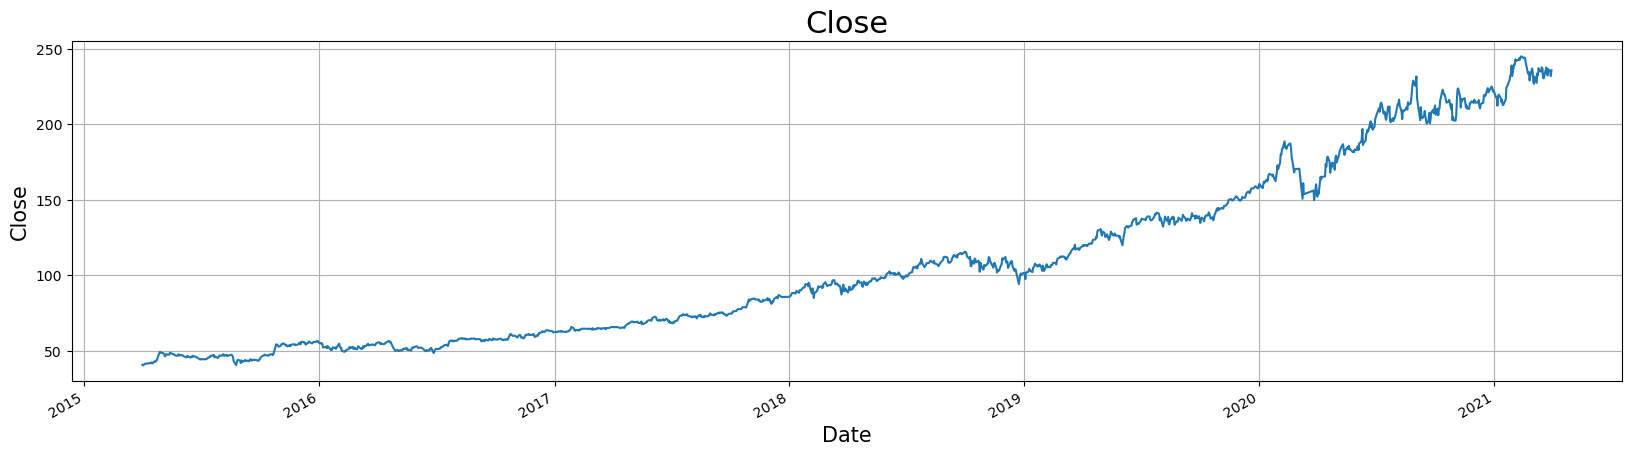

In [20]:
ax = df_filtered['Close'].plot(figsize=(20,5))
ax.set_title('Close', fontsize = 22)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Close', fontsize = 15)
plt.grid(True)
plt.show()

- ADF test for stationarity


In [21]:
results=adfuller(df_filtered['Close'])

In [22]:
print(results)

(1.9448635302165584, 0.9985968767646087, 15, 1448, {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}, 6174.326129512498)


In [23]:
print(f'Since our p-value is {results[0]} which is much greater than .05, our timeseries is non-stationary.' )



Since our p-value is 1.9448635302165584 which is much greater than .05, our timeseries is non-stationary.


## Transform to staionary


In [24]:
df_stationary=np.log(df_filtered).diff().dropna()

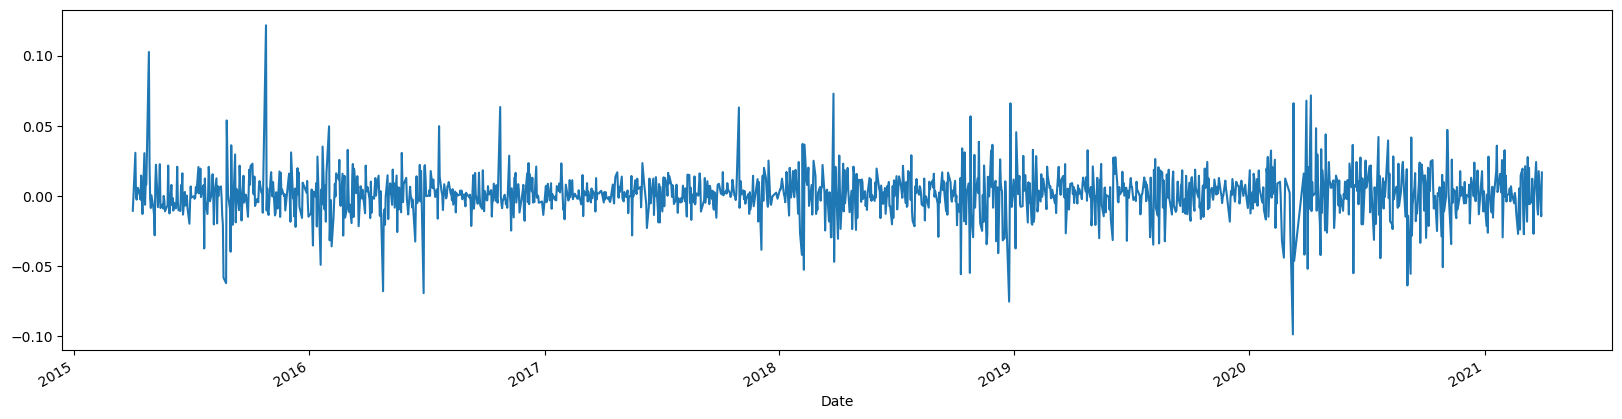

In [25]:
ax = df_stationary['Close'].plot(figsize=(20,5))

In [26]:
results=adfuller(df_stationary['Close'])

In [27]:
print(results)

(-18.886443657789496, 0.0, 4, 1458, {'1%': -3.434843038681996, '5%': -2.8635243777871286, '10%': -2.56782646544019}, -7836.7829920998975)


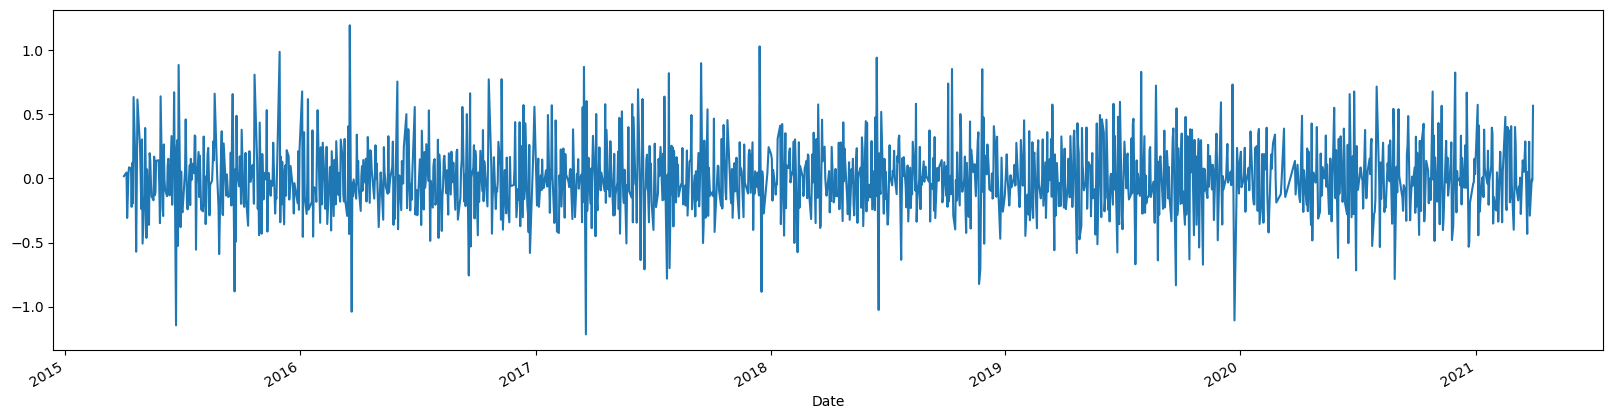

In [28]:
ax = df_stationary['Volume'].plot(figsize=(20,5))

## Modeling


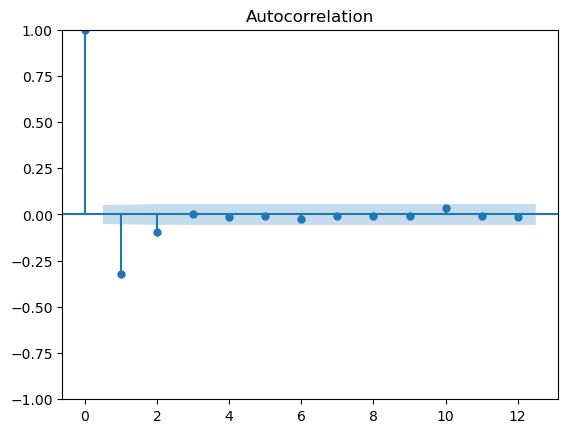

<Figure size 2000x1000 with 0 Axes>

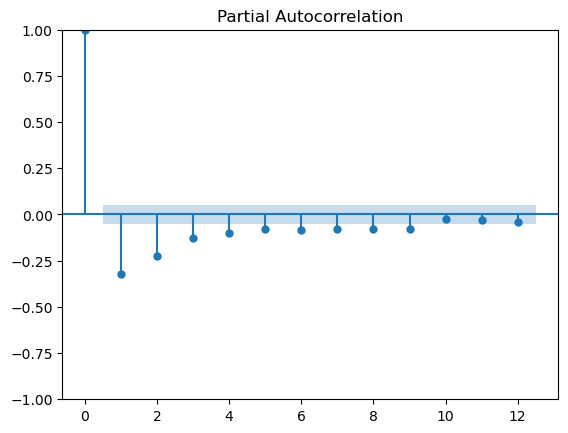

<Figure size 2000x1000 with 0 Axes>

In [29]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(df_stationary['Volume'], lags=12 )
plt.figure(figsize=(20,10))
plt.show()
tsaplots.plot_pacf(df_stationary['Volume'], lags=12 )
plt.figure(figsize=(20,10))
plt.show()


In [ ]:
#auto_arima
#results=pm.auto_arima(df['Close'])

In [ ]:
#print(results.summary())

In [ ]:
#results.plot_diagnostics()

In [31]:
def evaluate_arima_model(X, arima_order):
    
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [35]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
 

In [39]:
df=df_stationary['Close']
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(df, p_values, d_values, q_values)
